# Explore customer age

Null hypothesis: age does not influence buying behaviour.

In [1]:
setwd('/home/jovyan/work')

In [2]:
library(data.table)

In [3]:
transactions = arrow::read_parquet('data/transactions_train.parquet.snappy')

In [4]:
customers = arrow::read_parquet('data/customers.parquet.snappy')

In [5]:
setDT(transactions)
setDT(customers)

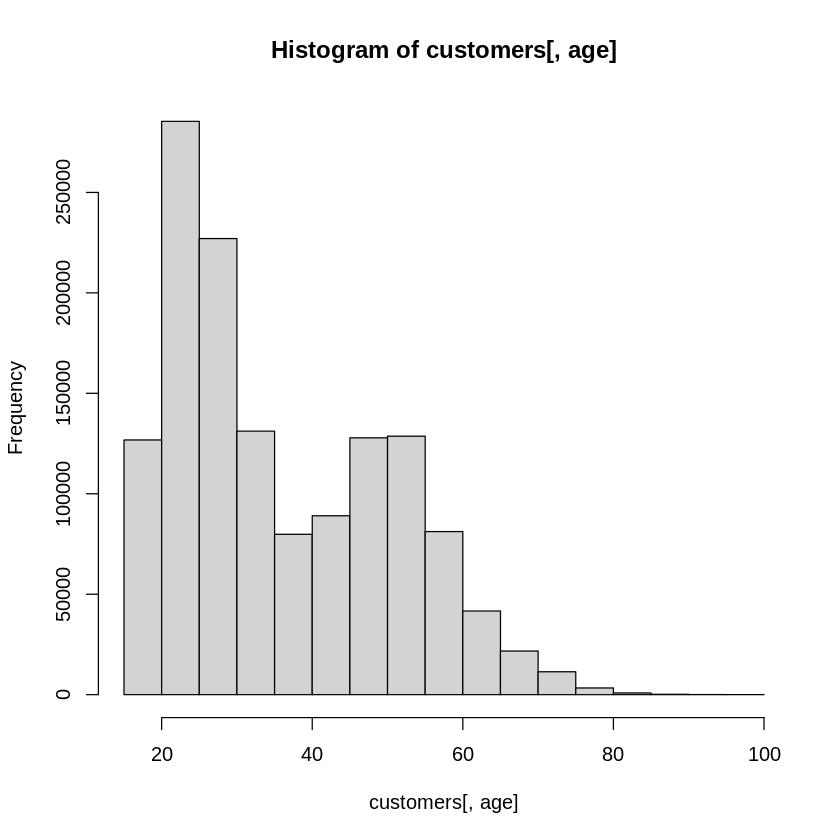

In [6]:
customers[,age] |> hist()

In [7]:
# customers nearly 100 years old!?
customers[age > 79] |> nrow()

[1] 1516

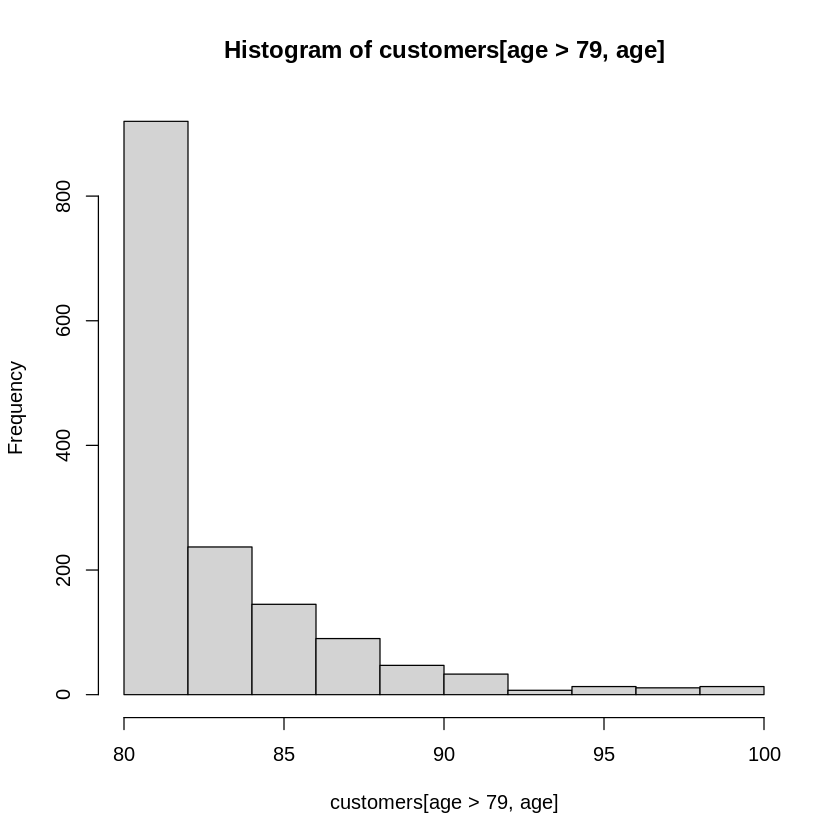

In [8]:
# lotta old customers, or "99" is a placeholder?
customers[age > 79, age] |> hist()

nah, doesn't really look like it, seems they might genuinely be 99 years old.

anyways, back to looking at the histogram

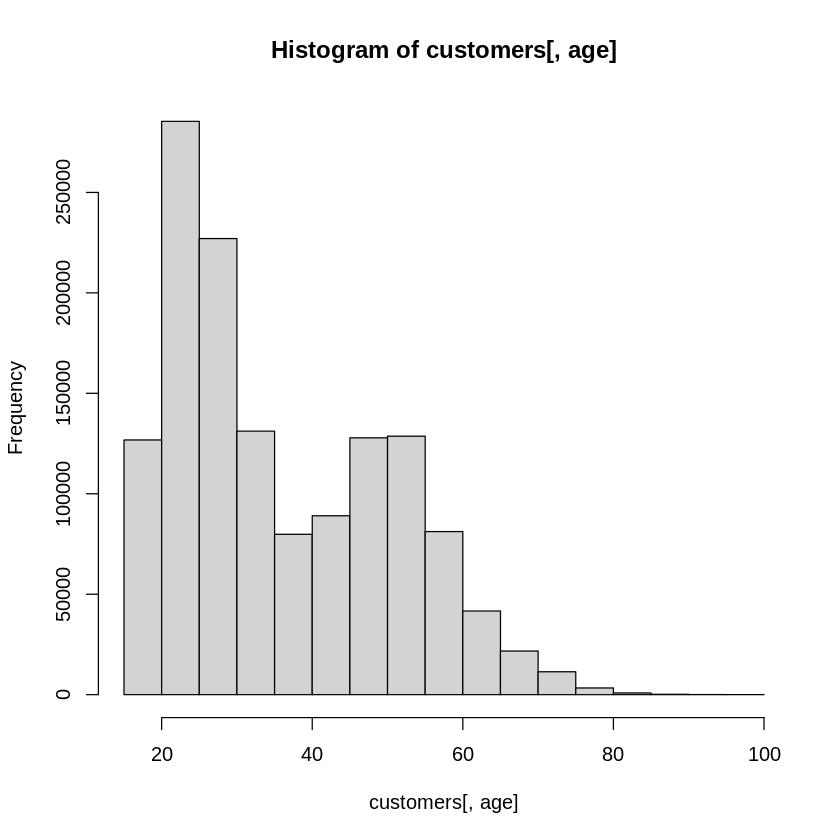

In [9]:
customers[,age] |> hist()

# Observations

Bimodal, first mode somewhere around mid 20s, the next at around 50.

Let's see how the distribution of transactions looks.

In [10]:
transactions_with_customer_info = merge(transactions, customers, by.x = 'customer_id', by.y = 'customer_id', all.x = TRUE)

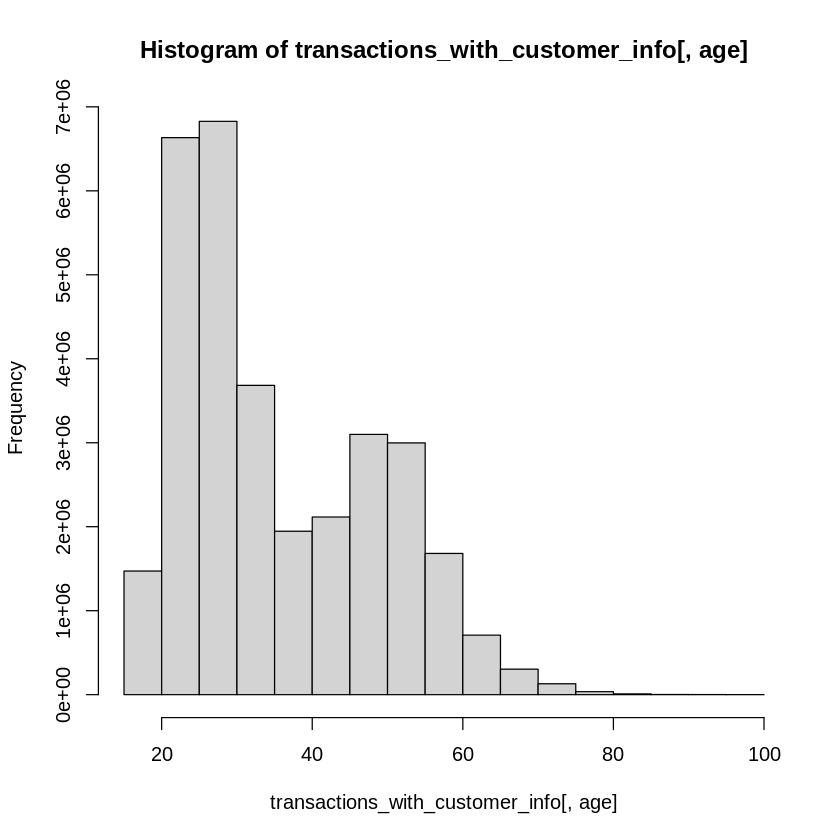

In [11]:
transactions_with_customer_info[,age] |> hist()

The distribution looks about the same.

Let's see what those modes actually are.

# Calculating the modes

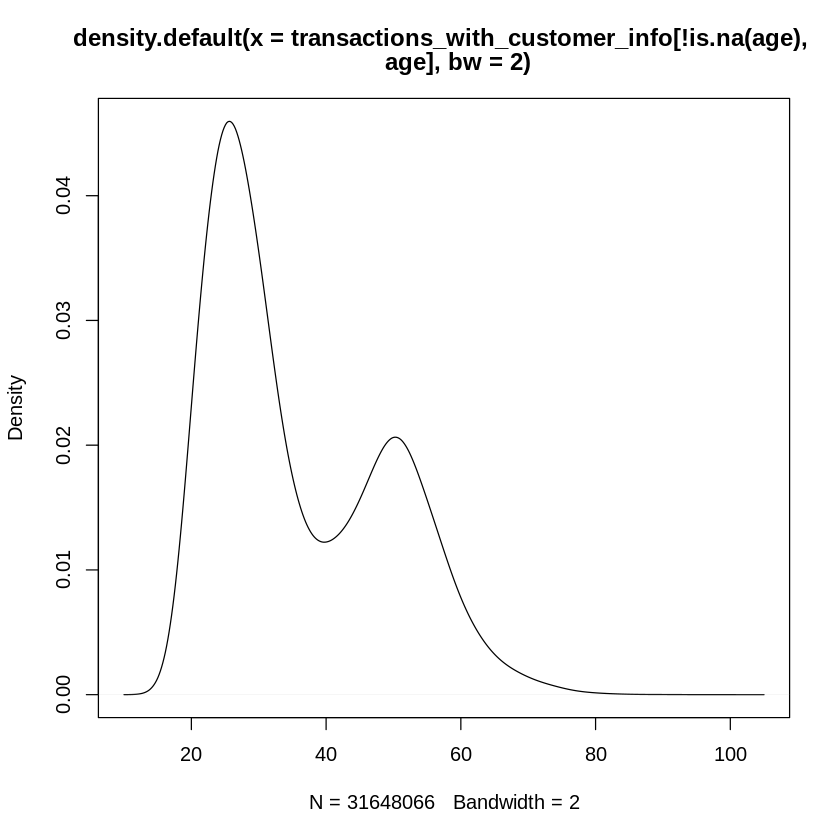

In [12]:
transactions_age_density = transactions_with_customer_info[!is.na(age),age] |> density(bw=2)
plot(transactions_age_density)

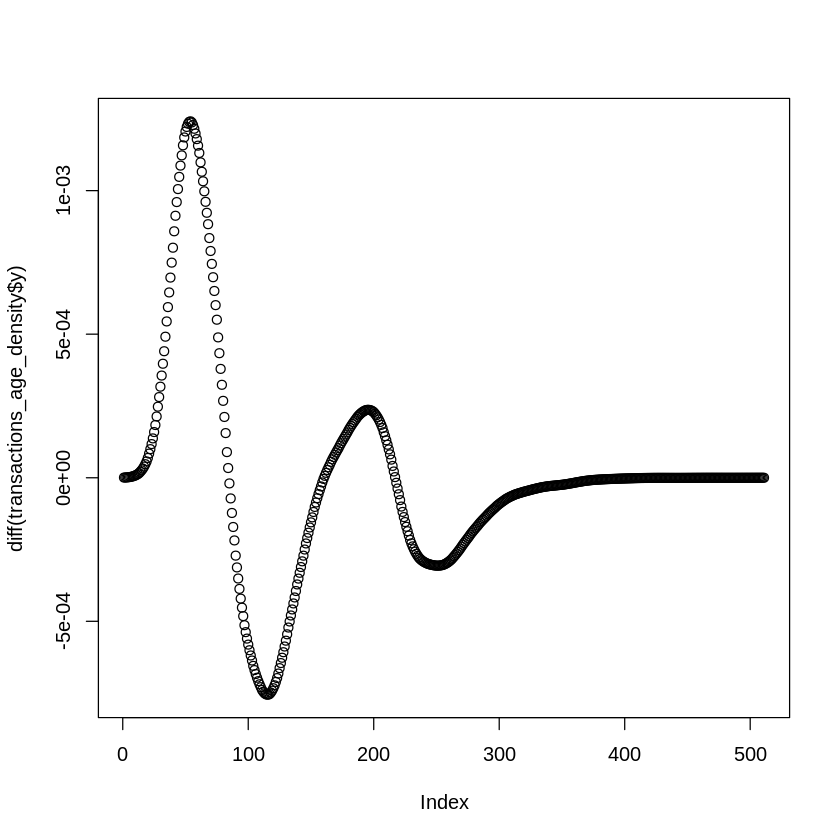

In [13]:
transactions_age_density$y |> diff() |> plot()

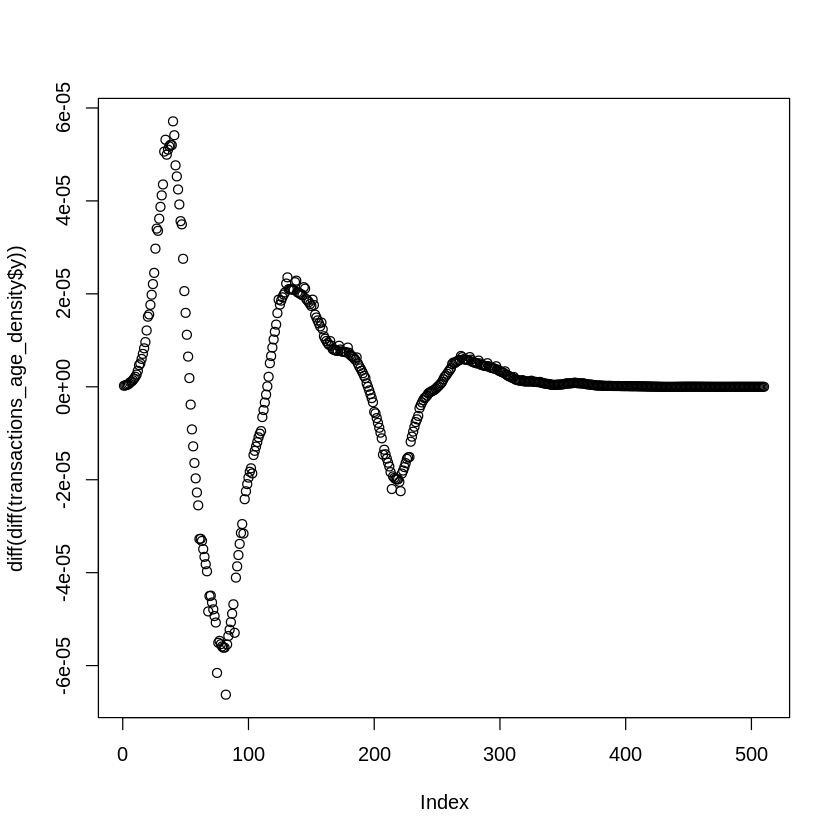

In [14]:
transactions_age_density$y |> diff() |> diff() |> plot()

In [15]:
transactions_mode_data = data.table(
  x = transactions_age_density$x,
  y = transactions_age_density$y,
  y1 = c(diff(transactions_age_density$y), NA),
  y2 = c(diff(diff(transactions_age_density$y)), NA, NA)
)

In [16]:
# filter values found by trial and error
transactions_mode_data[y2 < -0.0000199 & abs(y1) < 0.00003]

x,y,y1,y2
<dbl>,<dbl>,<dbl>,<dbl>
25.61644,0.04596248,-1.974547e-05,-5.226428e-05
50.34247,0.02064045,-1.759964e-05,-1.992621e-05


Looks like the first mode is at **26 years old** and the second mode is at **50 years old**.